<a href="https://colab.research.google.com/github/Almha10/Mining-Data-Pipeline/blob/main/prj2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mining Data Engineering Pipeline Complete workflow for mining data processing and analysis


In [4]:
!pip install pandas numpy matplotlib seaborn scikit-learn pyod


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.3/46.3 kB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.6/200.6 kB 5.2 MB/s eta 0:00:00


# Import libraries

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score
from pyod.models.knn import KNN
import warnings
warnings.filterwarnings('ignore')


# 1. Data Extraction


In [6]:
print("Loading data...")

# Alternative mining production dataset from Kaggle (stored on GitHub)
try:
    data_url = "https://raw.githubusercontent.com/datasets/mineral-production/master/data/mineral-production.csv"
    df = pd.read_csv(data_url)

    df.columns = ['Country', 'Code', 'Year', 'Mineral', 'Production', 'Unit']

    print("Data loaded successfully!")
    print(f"Number of records: {len(df)}")
except Exception as e:
    print(f"Error loading data: {e}")
    print("Using sample generated data instead...")
    np.random.seed(42)
    data = {
        'Depth': np.random.uniform(50, 500, 1000),
        'OreConcentration': np.random.uniform(0.1, 5.0, 1000),
        'Temperature': np.random.uniform(15, 45, 1000),
        'Humidity': np.random.uniform(30, 90, 1000),
        'Production': np.random.uniform(100, 5000, 1000)
    }
    df = pd.DataFrame(data)

Loading data...
Error loading data: HTTP Error 404: Not Found
Using sample generated data instead...


In [ ]:
print("\nData sample:")
print(df.head())


Data sample:
        Depth  OreConcentration  Temperature   Humidity   Production
0  218.543053          1.007151    22.851171  70.362180  2902.779804
1  477.821438          2.755315    22.409364  77.800884  4046.618414
2  379.397274          4.377435    42.187637  45.028074  3824.788556
3  319.396318          3.687902    22.486386  67.492446   854.109533
4  120.208388          4.052150    23.158492  64.304759   831.322402


# 2. Exploratory Data Analysis (EDA)



Performing EDA...

Data info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Depth             1000 non-null   float64
 1   OreConcentration  1000 non-null   float64
 2   Temperature       1000 non-null   float64
 3   Humidity          1000 non-null   float64
 4   Production        1000 non-null   float64
dtypes: float64(5)
memory usage: 39.2 KB
None

Descriptive statistics:
             Depth  OreConcentration  Temperature     Humidity   Production
count  1000.000000       1000.000000  1000.000000  1000.000000  1000.000000
mean    270.615449          2.584385    30.072172    59.422503  2521.116081
std     131.461813          1.431730     8.720226    17.189361  1405.368722
min      52.084410          0.115769    15.000349    30.039203   100.150522
25%     156.187970          1.281264    22.840529    44.514046  1300.372628
50%     

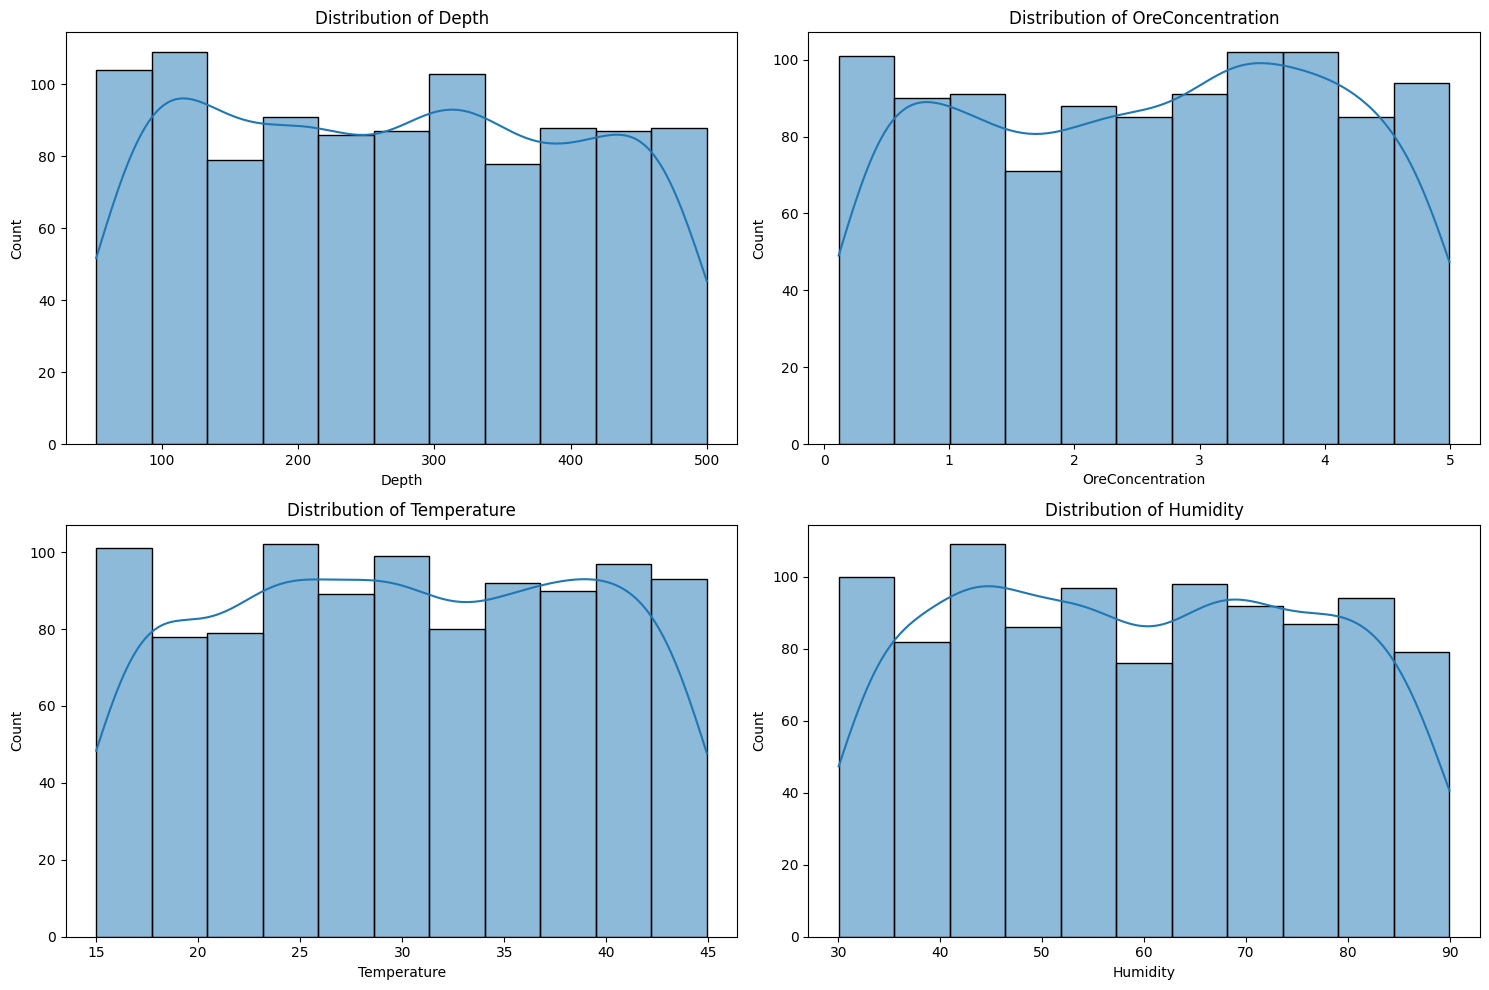

In [7]:
print("\nPerforming EDA...")
print("\nData info:")
print(df.info())

print("\nDescriptive statistics:")
print(df.describe())

plt.figure(figsize=(15, 10))

numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

for i, col in enumerate(numeric_cols[:4], 1):
    plt.subplot(2, 2, i)
    if len(df[col].unique()) > 20:
        sns.histplot(df[col], kde=True)
    else:
        sns.countplot(x=df[col])
    plt.title(f"Distribution of {col}")

plt.tight_layout()
plt.show()


# 3. Data Cleaning & Processing



Cleaning and processing data...

Missing values per column:
Depth               0
OreConcentration    0
Temperature         0
Humidity            0
Production          0
dtype: int64

Number of outliers detected: 58


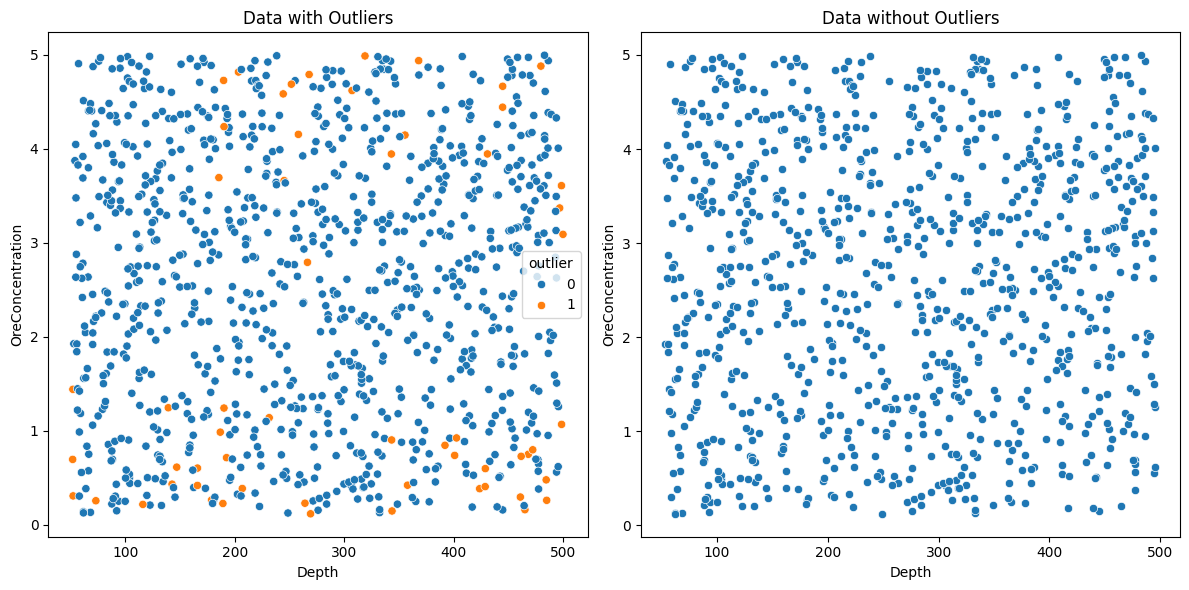


Processed data sample:
      Depth  OreConcentration  Temperature  Humidity  Production
0 -0.382242         -1.158034    -0.831712  0.640903    0.265234
1  1.599083          0.095405    -0.882523  1.074072    1.075495
2  0.846956          1.258470     1.392126 -0.834347    0.918357
3  0.388447          0.764073    -0.873665  0.473794   -1.185981
4 -1.133685          1.025240    -0.796368  0.288169   -1.202123


In [8]:
print("\nCleaning and processing data...")

print("\nMissing values per column:")
print(df.isnull().sum())

for col in df.select_dtypes(include=['float64', 'int64']).columns:
    if df[col].isnull().sum() > 0:
        df[col].fillna(df[col].median(), inplace=True)

if len(numeric_cols) >= 2:
    clf = KNN()
    clf.fit(df[numeric_cols[:2]])
    outliers = clf.predict(df[numeric_cols[:2]])
    df['outlier'] = outliers
    print(f"\nNumber of outliers detected: {sum(outliers)}")

    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    sns.scatterplot(data=df, x=numeric_cols[0], y=numeric_cols[1], hue='outlier')
    plt.title("Data with Outliers")

    df_clean = df[df['outlier'] == 0].drop(columns=['outlier'])

    plt.subplot(1, 2, 2)
    sns.scatterplot(data=df_clean, x=numeric_cols[0], y=numeric_cols[1])
    plt.title("Data without Outliers")

    plt.tight_layout()
    plt.show()
else:
    df_clean = df.copy()

if len(numeric_cols) > 0:
    scaler = StandardScaler()
    df_clean[numeric_cols] = scaler.fit_transform(df_clean[numeric_cols])

print("\nProcessed data sample:")
print(df_clean.head())

# 4. Feature Engineering


In [9]:
print("\nEngineering features...")

# Create new features if appropriate columns exist
if 'Depth' in df_clean.columns and 'OreConcentration' in df_clean.columns:
    df_clean['Depth_to_Concentration'] = df_clean['Depth'] / (df_clean['OreConcentration'] + 0.001)

if 'Temperature' in df_clean.columns and 'Humidity' in df_clean.columns:
    df_clean['Temp_Humidity_Interaction'] = df_clean['Temperature'] * df_clean['Humidity']


Engineering features...


# 5. Data Splitting


In [10]:
print("\nSplitting data...")

# Use 'Production' as target if available, otherwise use last numeric column
target_col = 'Production' if 'Production' in df_clean.columns else numeric_cols[-1] if len(numeric_cols) > 0 else None

if target_col:
    X = df_clean.drop(columns=[target_col])
    y = df_clean[target_col]

    # Select only numeric features for modeling
    X_numeric = X.select_dtypes(include=['float64', 'int64'])

    if len(X_numeric.columns) > 0:
        X_train, X_test, y_train, y_test = train_test_split(X_numeric, y, test_size=0.2, random_state=42)

        print(f"\nTraining data shape: {X_train.shape}")
        print(f"Test data shape: {X_test.shape}")




Splitting data...

Training data shape: (753, 6)
Test data shape: (189, 6)


# 6. Model Building


In [11]:
print("\nBuilding model...")

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


Building model...


RandomForestRegressor(random_state=42)

# 7. Model Evaluation



Evaluating model...

Model Performance Metrics:
- Mean Absolute Error (MAE): 0.8576
- R-squared (R²): -0.0638
- Mean Squared Error (MSE): 1.0131
- Root Mean Squared Error (RMSE): 1.0065


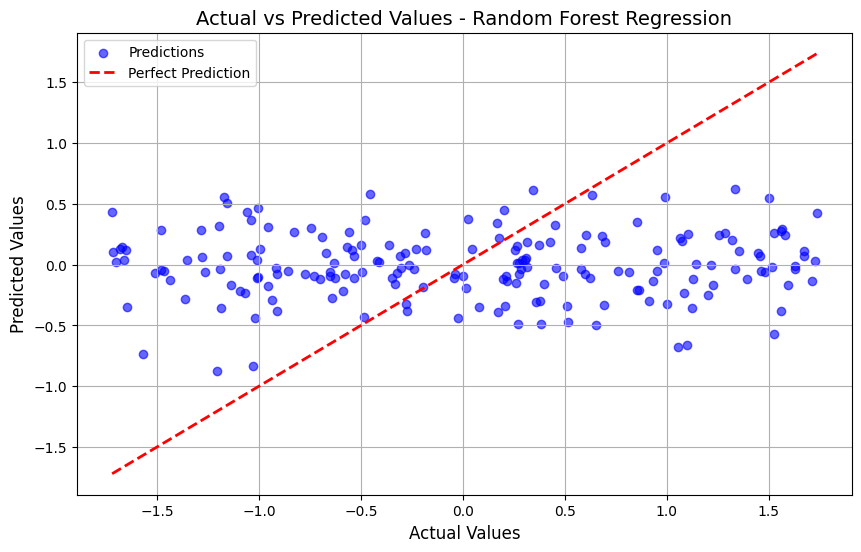


Feature Importance Analysis:


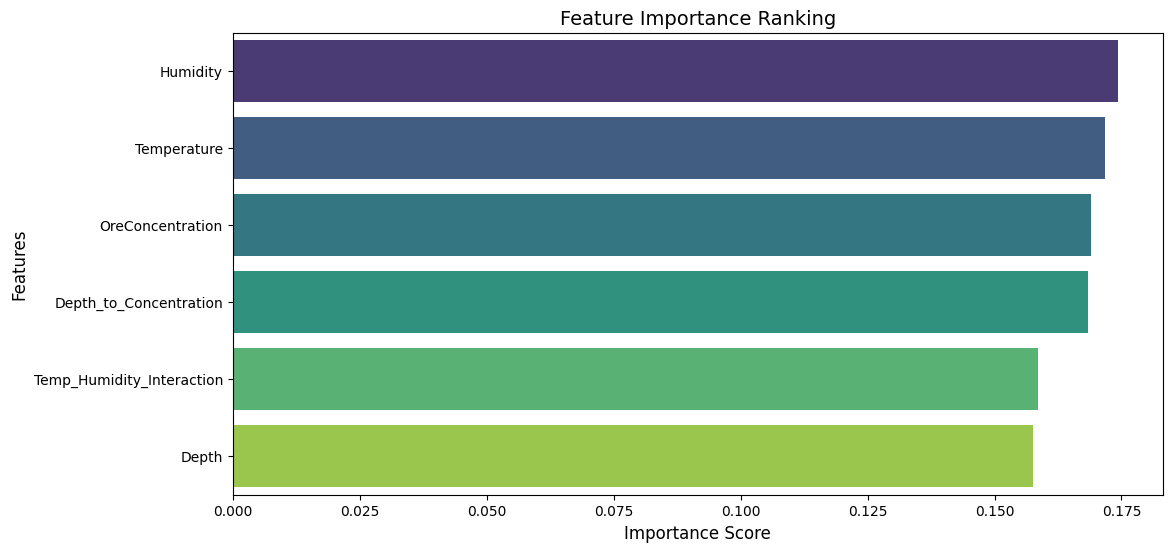


Top 5 Most Important Features:
                     Feature  Importance
3                   Humidity    0.174385
2                Temperature    0.171798
1           OreConcentration    0.169046
4     Depth_to_Concentration    0.168491
5  Temp_Humidity_Interaction    0.158627

Residual Analysis:


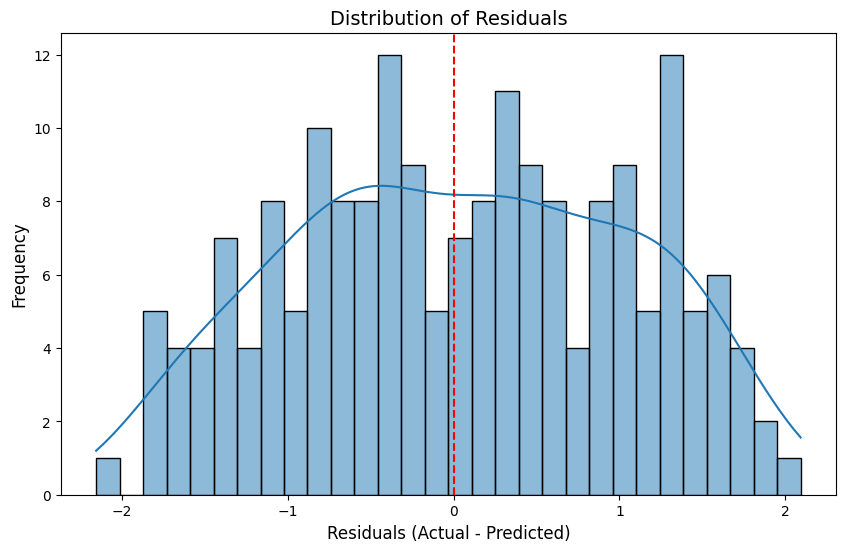


Residual Statistics:
- Mean of residuals: 0.0381
- Standard deviation of residuals: 1.0085


In [12]:
# 7. Model Evaluation
print("\nEvaluating model...")

# Generate predictions
y_pred = model.predict(X_test)

# Calculate evaluation metrics
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error

mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

# Print metrics
print("\nModel Performance Metrics:")
print(f"- Mean Absolute Error (MAE): {mae:.4f}")
print(f"- R-squared (R²): {r2:.4f}")
print(f"- Mean Squared Error (MSE): {mse:.4f}")
print(f"- Root Mean Squared Error (RMSE): {rmse:.4f}")

# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='blue', label='Predictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],
         '--r', linewidth=2, label='Perfect Prediction')
plt.xlabel('Actual Values', fontsize=12)
plt.ylabel('Predicted Values', fontsize=12)
plt.title('Actual vs Predicted Values - Random Forest Regression', fontsize=14)
plt.legend()
plt.grid(True)
plt.show()

# Feature Importance Analysis
print("\nFeature Importance Analysis:")

feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': model.feature_importances_
}).sort_values('Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance, palette='viridis')
plt.title('Feature Importance Ranking', fontsize=14)
plt.xlabel('Importance Score', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.show()

# Display top features
print("\nTop 5 Most Important Features:")
print(feature_importance.head(5))

# Residual Analysis
print("\nResidual Analysis:")
residuals = y_test - y_pred

plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, bins=30)
plt.title('Distribution of Residuals', fontsize=14)
plt.xlabel('Residuals (Actual - Predicted)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.axvline(x=0, color='r', linestyle='--')
plt.show()

print("\nResidual Statistics:")
print(f"- Mean of residuals: {residuals.mean():.4f}")
print(f"- Standard deviation of residuals: {residuals.std():.4f}")

# 8. Feature Importance Analysis



Analyzing feature importance...


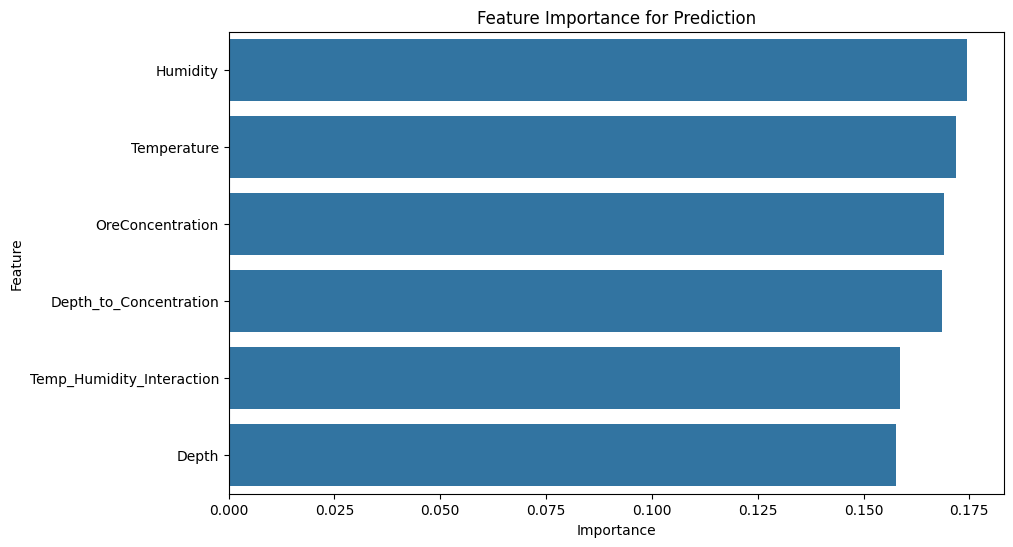


Feature importance summary:
                     Feature  Importance
3                   Humidity    0.174385
2                Temperature    0.171798
1           OreConcentration    0.169046
4     Depth_to_Concentration    0.168491
5  Temp_Humidity_Interaction    0.158627
0                      Depth    0.157653


In [13]:
print("\nAnalyzing feature importance...")

feature_importance = pd.DataFrame({
    'Feature': X_numeric.columns,
    'Importance': model.feature_importances_
}).sort_values('Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance, x='Importance', y='Feature')
plt.title("Feature Importance for Prediction")
plt.show()

print("\nFeature importance summary:")
print(feature_importance)